# Transcript from Lecture 8, February 7, 2023


In [1]:
import sys

########################################
# Change the string in the line below! #
########################################
sys.path.append("/Users/gilbert/Documents/CS111-2023-winter/Python") 

import os
import time
import math
import numpy as np
import numpy.linalg as npla
import scipy
from scipy import linalg as spla
import scipy.sparse
import scipy.sparse.linalg
from scipy import integrate
import networkx as nx
import cs111

##########################################################
# If this import for matplotlib doesn't work, try saying #
#   conda install -c conda-forge ipympl                  #
# at a shell prompt on your computer                     #
##########################################################
import matplotlib
# %matplotlib ipympl
# %matplotlib tk
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d




np.set_printoptions(precision = 4)

# cs111 module code for Jacobi

In [ ]:
cs111.Jsolve?

# Jacobi on the temperature problem

In [2]:
# Jacobi on the temperature problem
k = 100
A = cs111.make_A(k)
b = cs111.make_b(k, right=cs111.radiator(k))

In [3]:
A.shape

(10000, 10000)

In [4]:
A.nnz

49600

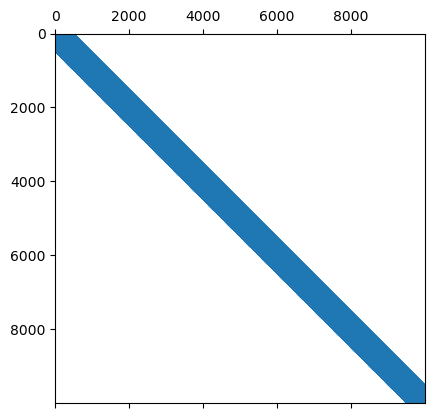

In [5]:
plt.spy(A)

In [6]:
t = scipy.sparse.linalg.spsolve(A,b)
t.shape

(10000,)

Text(0.5, 1.0, 'Temperature by scipy.sparse.linalg.spsolve')

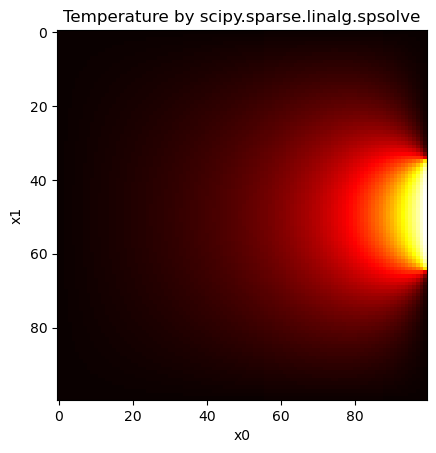

In [7]:
Tscipy = t.reshape(k, k)
plt.figure()
plt.imshow(Tscipy, cmap=cm.hot)
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Temperature by scipy.sparse.linalg.spsolve')

In [8]:
t, resvec = cs111.Jsolve(A,b, max_iters=10)
resvec

[1.0,
 0.5542945049874644,
 0.4002642837972196,
 0.3190119823562452,
 0.2679303998944448,
 0.23248621574849976,
 0.20627524658793236,
 0.18600765094325752,
 0.16980907607726523,
 0.15652841397547487,
 0.14541721825234222]

Text(0.5, 1.0, 'Temperature by Jacobi, 10 iterations')

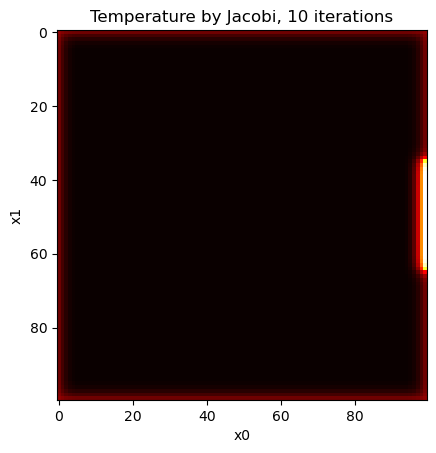

In [9]:
T = t.reshape(k, k)
plt.figure()
plt.imshow(T, cmap=cm.hot)
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Temperature by Jacobi, 10 iterations')

Text(0.5, 1.0, 'Temperature by scipy.sparse.linalg.spsolve')

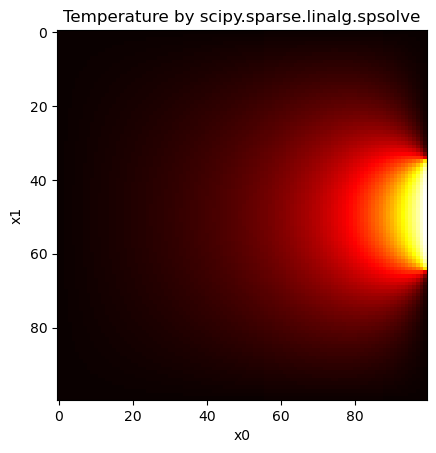

In [10]:
plt.figure()
plt.imshow(Tscipy, cmap=cm.hot)
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Temperature by scipy.sparse.linalg.spsolve')


Relative residual norm after 10000 iterations: 4.974732257148454e-05


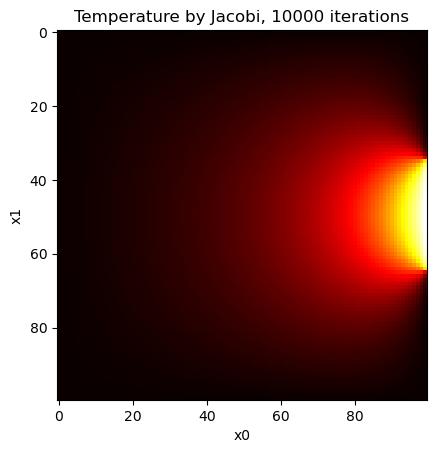

In [13]:
# Try this for 100, 1000, 10000, ... iterations
t, resvec = cs111.Jsolve(A,b, max_iters=10000)

T = t.reshape(k, k)
plt.figure()
plt.imshow(T, cmap=cm.hot)
plt.xlabel('x0')
plt.ylabel('x1')
plt.title(f'Temperature by Jacobi, {len(resvec)-1} iterations')
print(f'Relative residual norm after {len(resvec)-1} iterations: {resvec[-1]}')


Jacobi iters: 10000
last rel res: 4.974732257148454e-05
computed rel res: 4.974732257148454e-05


Text(0.5, 1.0, 'Iterative methods for temperature problem with n = 10000')

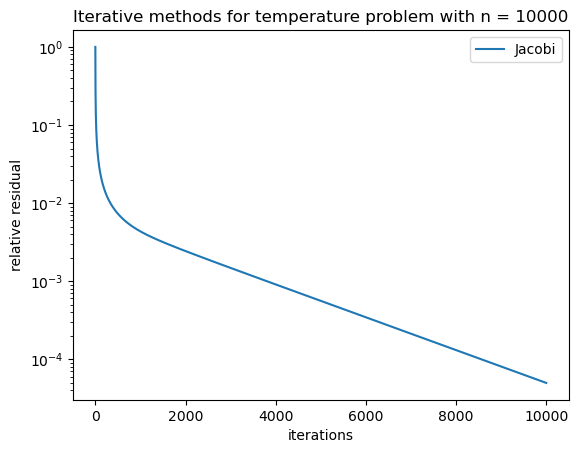

In [14]:
# Plot relative residual norm as a function of iteration for Jacobi
plt.figure()

(xJ,resvecJ) = cs111.Jsolve(A, b, tol = 1e-6, max_iters = 10000)
print('\nJacobi iters:', len(resvecJ)-1)
print('last rel res:', resvecJ[-1])
print('computed rel res:', npla.norm(A@xJ - b) / npla.norm(b))
plt.semilogy(resvecJ, label = 'Jacobi')

plt.legend()
plt.xlabel('iterations')
plt.ylabel('relative residual')
plt.title('Iterative methods for temperature problem with n = %d' % A.shape[0])

# Conjugate gradient iteration (SPD matrices only)

In [15]:
# Conjugate gradient is a more powerful iterative method than Jacobi
t, resvec = cs111.CGsolve(A,b, max_iters=200)
resvec[-1]

9.372731143661088e-06


Jacobi iters: 1000
last rel res: 0.004335982306673086
computed rel res: 0.004335982306673086

CG iters: 270
last rel res: 9.809648158306162e-09
computed rel res: 9.809648158306162e-09


Text(0.5, 1.0, 'Iterative methods for temperature problem with n = 10000')

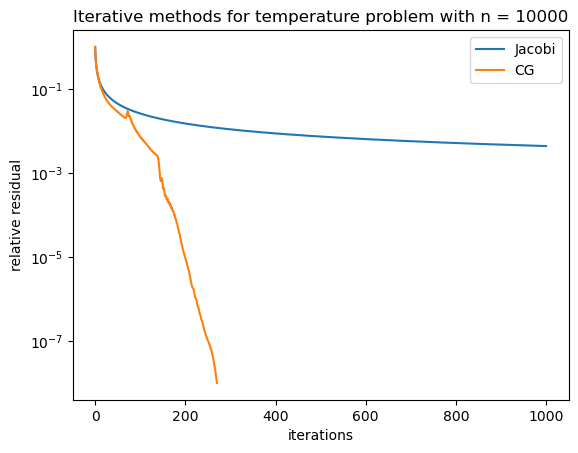

In [16]:
# Plot relative residual (y axis) versus iteration number (x axis) for both Jacobi and CG

%matplotlib inline
plt.figure()

(xJ,resvecJ) = cs111.Jsolve(A, b, tol = 1e-8, max_iters = 1000)
print('\nJacobi iters:', len(resvecJ)-1)
print('last rel res:', resvecJ[-1])
print('computed rel res:', npla.norm(A@xJ - b) / npla.norm(b))
plt.semilogy(resvecJ, label = 'Jacobi')

(xCG,resvecCG) = cs111.CGsolve(A, b, tol = 1e-8, max_iters = 1000)
print('\nCG iters:', len(resvecCG)-1)
print('last rel res:', resvecCG[-1])
print('computed rel res:', npla.norm(A@xCG - b) / npla.norm(b))
plt.semilogy(resvecCG, label = 'CG')

plt.legend()
plt.xlabel('iterations')
plt.ylabel('relative residual')
plt.title('Iterative methods for temperature problem with n = %d' % A.shape[0])

In [17]:
scipy.sparse.linalg.cg?

# CG works if the matrix is symmetric positive definite (SPD)

In [18]:
A = cs111.make_A(2).toarray()
A

array([[ 4., -1., -1.,  0.],
       [-1.,  4.,  0., -1.],
       [-1.,  0.,  4., -1.],
       [ 0., -1., -1.,  4.]])

In [19]:
# Symmetric:
np.all(A == A.T)

True

In [20]:
# Positive definite: LU without partial pivoting works, and all pivots are positive:
L, U = cs111.LUfactorNoPiv(A)
U.diagonal()

array([4.    , 3.75  , 3.7333, 3.4286])

In [21]:
L

array([[ 1.    ,  0.    ,  0.    ,  0.    ],
       [-0.25  ,  1.    ,  0.    ,  0.    ],
       [-0.25  , -0.0667,  1.    ,  0.    ],
       [ 0.    , -0.2667, -0.2857,  1.    ]])

In [22]:
U

array([[ 4.    , -1.    , -1.    ,  0.    ],
       [ 0.    ,  3.75  , -0.25  , -1.    ],
       [ 0.    ,  0.    ,  3.7333, -1.0667],
       [ 0.    ,  0.    ,  0.    ,  3.4286]])

In [23]:
# Positive definite: Eigenvalues are all positive
vals, vecs = npla.eig(A)
vals

array([2., 4., 6., 4.])

In [24]:
# Positive definite: x.T @ A @ x > 0 for every nonzero vector x
x = np.random.randn(4)
x

array([ 0.8084,  0.4456, -0.5421, -0.3296])

In [25]:
x.T @ A @ x

5.110891508528401

In [ ]:
np.random.randn?

<b>Theorem: If A is any matrix, square or not, with full column rank (i.e. all the columns are linearly independent), then A.T @ A is SPD.

In [26]:
A = np.random.random((8,4))
A

array([[0.9934, 0.678 , 0.1832, 0.1622],
       [0.3611, 0.1453, 0.7938, 0.2148],
       [0.1569, 0.4201, 0.0614, 0.4041],
       [0.7179, 0.3939, 0.4063, 0.7172],
       [0.2723, 0.7094, 0.0309, 0.9793],
       [0.2706, 0.9372, 0.2234, 0.5941],
       [0.8621, 0.3288, 0.5153, 0.335 ],
       [0.9206, 0.8427, 0.5707, 0.3169]])

In [27]:
npla.matrix_rank(A)

4

In [28]:
B = A.T @ A
B

array([[3.3954, 2.5807, 1.8085, 1.8249],
       [2.5807, 3.0123, 1.3071, 2.222 ],
       [1.8085, 1.3071, 1.4747, 1.0329],
       [1.8249, 2.222 , 1.0329, 2.2746]])

In [29]:
vals, vecs = npla.eig(B)
vals

array([8.2585, 1.1897, 0.2349, 0.474 ])

In [30]:
L, U = cs111.LUfactorNoPiv(B)
U.diagonal()

array([3.3954, 1.0508, 0.5071, 0.6044])

<b> Every entry of A.T @ A is the dot product of two columns of A

In [31]:
A[:, 2].dot(A[:,0])

1.8084864691000824

In [32]:
B[2,0]

1.8084864691000826